<a href="https://colab.research.google.com/github/CryTechno/DIP/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Початок роботи з бібліотекою OpenCV

У даній лабораторній роботі розглянуто наступний функціонал бібліотеки OpenCV:
1. Зчитування, запис та відображення зображень.
2. Визначення параметрів зображення - розмір, канали, колір.
3. Доступ до окремих пікселів та робота з групою пікселів.

## Імпорт бібліотек та пакетів

Завантажуємо бібліотеку OpenCV.

In [ ]:
import cv2

OpenCV завантажує зображення у вигляді багатомірних масивів та матриць.
Для операції з багатомірними масивами та матрицями імпортуємо бібліотеку NumPy.

In [ ]:
import numpy as np

Імпортуємо функцію **pyplot** з бібліотеки Matplotlib для відображення зображень.

In [ ]:
import matplotlib.pyplot as plt

## Зчитування зображень

Для зчитування зображення з диска використовується функція **imread**. Дана функція завантажує зображення із зазначеного файлу та повертає масив даних. У випадку коли файл із зображенням відсутній, функція повертає **None**. Функція **imread** підтримує більшість відомих форматів зображень (PNG, BMP, JPG).

### Синтаксис функції
    retval = cv2.imread(filename [, flags])
Параметри:
* **filename** - відносний або абсолютний шлях до файлу із зображенням. Обов'язковий параметр.<br>
* **flags** - даний параметр визначає формат зчитування зображення:<br>
    * cv2.IMREAD_COLOR - зчитування кольорового зображення;
    * cv2.IMREAD_GRAYSCALE - зчитування зображення у відтінках сірого;
    * cv2.IMREAD_UNCHANGED - зчитування зображення без змін при наявності альфа-каналу.


In [ ]:
img_bw = cv2.imread("./examples/1_8.png", cv2.IMREAD_GRAYSCALE)

Надрукуємо масив **img**.

In [ ]:
print(img_bw)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  13  13   0   0   0   0   0   0   0]
 [  0   0   0   0   0 128 244 255 255 244 131   0   0   0   0   0]
 [  0   0   0   0  86 255 170  36  35 173 255  85   0   0   0   0]
 [  0   0   0   3 143 255   0   0   0   0 255 130   0   0   0   0]
 [  0   0   0   0 122 255   0   0   0   0 255 120   0   0   0   0]
 [  0   0   0   0  38 223 183  44  45 182 223  39   0   0   0   0]
 [  0   0   0   0   0  82 255 235 234 253  79   0   0   0   0   0]
 [  0   0   0   0  91 255  99  34  33  94 255  89   0   0   0   0]
 [  0   0   0  15 214 168   0   0   0   0 166 208  14   0   0   0]
 [  0   0   0  18 235 140   0   0   0   0 138 230  18   0   0   0]
 [  0   0   0   7 170 244  52   0   0  49 245 163   6   0   0   0]
 [  0   0   0   0  41 232 247 211 211 245 235  44   0   0   0   0]
 [  0   0   0   0   0  11  66 136 135  67  11   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

Завантажене чорно-біле зображення (у сірих відтінках) представлене двомірним масивом. Кожний елемент масиву - число, що представляє значення яскравості окремого пікселя. **0** - мінімальне значення яскравості, **255** - максимальне значення яскравості.

<h2>Відображення зображень</h2>

### OpenCV
Для відображення зображень за допомогою OpenCV використовується функція **imshow**. Дана функція використовується для відображення зображень при запуску сценаріїв Python у командній консолі.

### Синтаксис функції
    cv2.imshow(winname, mat)
Параметри:<br>
* **winname** - назва вікна.<br><br>
* **mat** - зображення.<br>

Приклад використання функції **imshow** при виконанні скрипта Python у командній консолі:

Відображення зображення в окремому вікні<br>
<code>cv2.imshow("Image", img)</code><br>
Зачекати допоки користувач натисне кнопку для виходу з режиму відображення<br>
<code>cv2.waitKey(0)</code><br>
Знищення вікна<br>
<code>cv2.destroyAllWindows()</code>


### Matplotlib
Для відображення зображень за допомогою Matplotlib використовується функція plt.imshow. Протягом всього курсу дана функція використовується для відображення зображень у робочому середовищі Jupyter Notebook.

### Синтаксис функції
    plt.imshow(mat, cmap=None)
Параметри:<br>
* **mat** - зображення.
* **cmap** - тип колірної моделі Matplotlib.

Приклад використання функції **plt.imshow**:

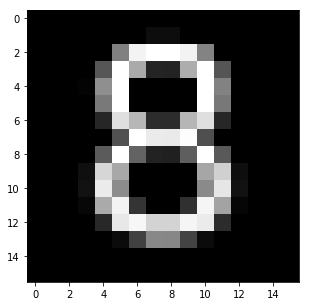

In [ ]:
# Створити робоче вікно із заданим розміром
plt.figure(figsize=(5, 5))

# Відобразити зображення
plt.imshow(img_bw, cmap='gray')

# Показати робоче вікно
plt.show();

## Зчитування та відображення кольорового зображення

Завантаження кольорового зображення.

In [ ]:
img = cv2.imread("./examples/rgb.png")

За замовчуванням OpenCV завантажує кольорові зображення, використовуючи колірну модель **BGR**. Функція **imshow** пакету **matplotlib.pyplot** відображає зображення, використовуючи колірну модель **RGB**. Для коректного відображення колірну модель зображення необхідно перетворити з BGR в RGB. Для цього використовують функцію OpenCV **cvtColor**.

### Синтаксис функції
    dst = cv2.cvtColor(src, code [, dst[, dstCn]])
Параметри:

* **src** - вхідне зображення.
* **code** - код перетворення колірних моделей.

Приклад використання функції **cv2.cvtColor**:

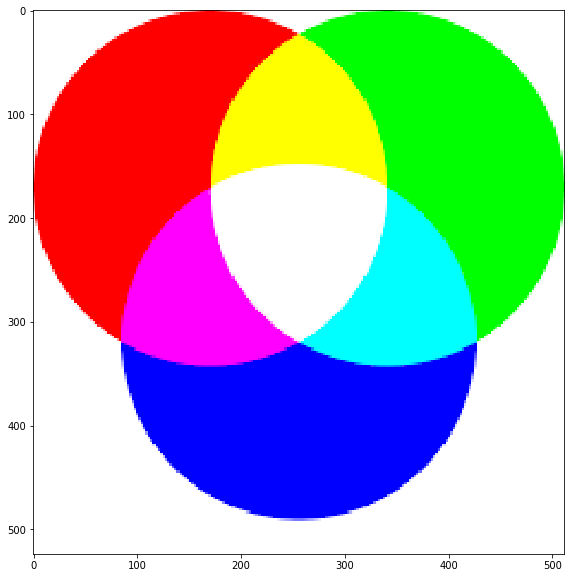

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.show();

Для спрощення попередній код можна переписати наступним чином:

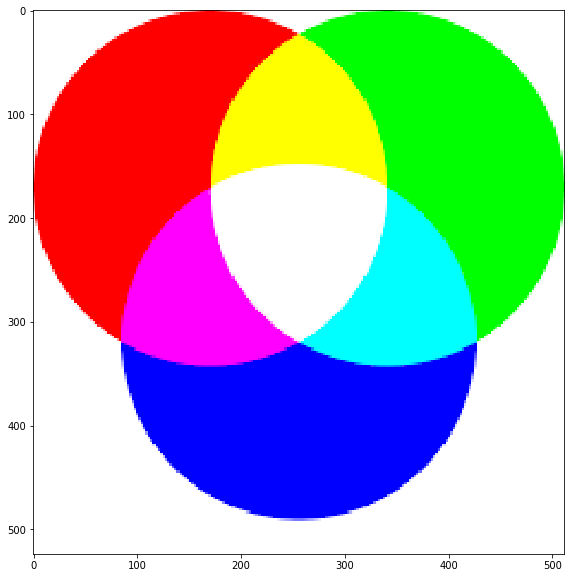

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show();

## Параметри зображень
Основними параметрами зображення, при використанні OpenCV, є розмір зображення та кількість каналів, тип даних та тип об'єкту якими представлено зображення.

Визначимо розміри чорно-білого зображення:

In [ ]:
img_bw.shape

(16, 16)

Дане чорно-біле зображення має наступні параметри:
* висота - 16 пікселів
* ширина - 16 пікселів

Визначимо розміри кольорового зображення:

In [ ]:
img.shape

(524, 512, 3)

Дане кольорове зображення має наступні параметри:
* висота - 524 пікселів
* ширина - 512 пікселів
* кількість каналів - 3

Визначимо яким типом даних представлені значення яскравості окремих пікселів чорно-білого та кольорового зображення:

In [ ]:
print("Type = %s"%(img_bw.dtype))
print("Type = %s"%(img.dtype))

Type = uint8
Type = uint8


Визначимо яким типом даних представлено чорно-біле та кольорове зображення:

In [ ]:
print("Type = %s"%type(img_bw))
print("Type = %s"%type(img))

Type = <type 'numpy.ndarray'>
Type = <type 'numpy.ndarray'>


## Доступ до окремих пікселів та групи пікселів.

### Доступ до окремих пікселів
Для отримання доступу до значення яскравості окремого пікселя необхідно використати відповідні індекси. Наприклад, для чорно-білого зображення отримаємо значення яскравості пікселів з координатами (0, 0), (7, 7), (15, 15):

In [ ]:
# (0,0)
print(img_bw[0, 0])

# (7, 7)
print(img_bw[int(img_bw.shape[0] / 2 - 1), int(img_bw.shape[1] / 2 - 1)])

# (15, 15)
print(img_bw[int(img_bw.shape[0] - 1), int(img_bw.shape[1] - 1)])

0
235
0


Для кольорового зображення отримаємо значення яскравості пікселів із координатами (0, 0), (261, 255), (523, 511):

In [ ]:
# (0, 0)
print(img_rgb[0, 0])

# (261, 255)
print(img[int(img_rgb.shape[0] / 2 - 1), int(img_rgb.shape[1] / 2 - 1)])

# (523, 511)
print(img_rgb[int(img_rgb.shape[0] - 1), int(img_rgb.shape[1] - 1)])

[255 255 255]
[255 255 255]
[255 255 255]


Також, для кольорового зображення, отримаємо значення яскравості пікселів з відомими кольорами - червоний, зелений, синій:

In [ ]:
# піксель з червоним кольором
print(img_rgb[100,100])

# піксель з зеленим кольором
print(img_rgb[100, 400])

# піксель з синім кольором
print(img_rgb[400, 250])

[255   0   0]
[  0 255   0]
[  0   0 255]



## Доступ до групи пікселів

Для доступу до групи пікселів використовують пари матричних індексів для завдання необхідних діапазонів:

[[  0 128 244 255 255 244 131   0]
 [ 86 255 170  36  35 173 255  85]
 [143 255   0   0   0   0 255 130]
 [122 255   0   0   0   0 255 120]
 [ 38 223 183  44  45 182 223  39]
 [  0  82 255 235 234 253  79   0]]


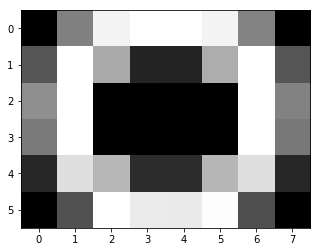

In [ ]:
img_crop_bw = img_bw[2:8, 4:12]
print(img_crop_bw)
plt.imshow(img_crop_bw, cmap='gray')
plt.show()

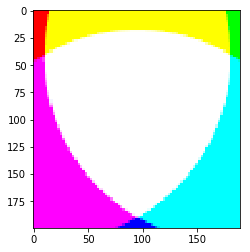

In [ ]:
img_crop_rgb = img_rgb[130:330, 160:350]
plt.imshow(img_crop_rgb)
plt.show()

### Доступ до окремих колірних каналів кольорового зображення

Щоб отримати доступ до окремого колірного каналу зображення необхідно використати відповідний матричний індекс.

Приклад доступу до окремих колірних каналів за допомогою індексу:

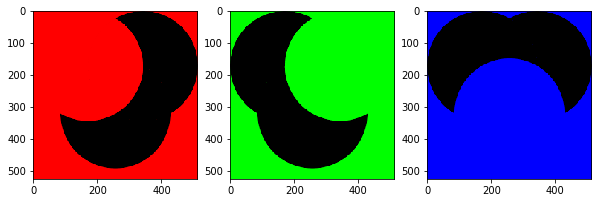

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(131);
R = np.zeros(img_rgb.shape, dtype='uint8')
R[:, :, 0] = img_rgb[:, :, 0]
plt.imshow(R)

plt.subplot(132);
G = np.zeros(img_rgb.shape, dtype='uint8')
G[:, :, 1] = img_rgb[:, :, 1]
plt.imshow(G)

plt.subplot(133);
B = np.zeros(img_rgb.shape, dtype='uint8')
B[:, :, 2] = img_rgb[:, :, 2]
plt.imshow(B)

plt.show()

Після того як всі необхідні операції з окремими колірними каналами виконано, їх можна об'єднати за допомогою функції **merge**. Ця функція об'єднує декілька окремих матриць однакового розміру в один багатовимірний масив.

### Синтаксис функції
    dst = cv2.merge(mv[, dst])
Параметри:

* **mv** - вектор масивів, якими представлено колірні канали.

In [ ]:
# встановимо всі значення яскравості піксела синього каналу рівними 0
B[:, :, 2] = 0

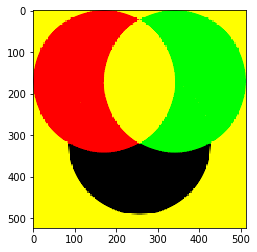

In [ ]:
img_merge = cv2.merge((R[:, :, 0], G[:, :, 1], B[:, :, 2]))

plt.imshow(img_merge)
plt.show()

Також отримати доступ до окремих каналів можна за допомогою функції **split**. Дана функція розбиває зображення, як представлене багатомірним масивом на окремі масиви, які містять значення яскравості відповідних каналів.

### Синтаксис функції
    dst = cv2.split(img)
Параметри:

* **img** - вхідне зображення.

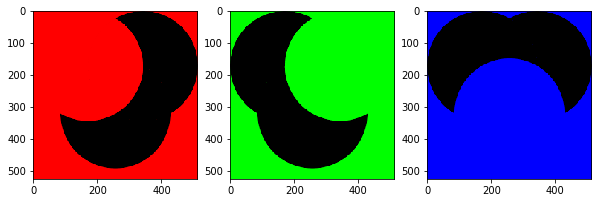

In [ ]:
plt.figure(figsize=(10, 10))

b, g, r = cv2.split(img)
plt.subplot(131);
R = np.zeros(img_rgb.shape, dtype='uint8')
R[:, :, 0] = r
plt.imshow(R)

plt.subplot(132);
G = np.zeros(img_rgb.shape, dtype='uint8')
G[:, :, 1] = g
plt.imshow(G)

plt.subplot(133);
B = np.zeros(img_rgb.shape, dtype='uint8')
B[:, :, 2] = b
plt.imshow(B)

plt.show()

## Збереження зображень
Для збереження зображень за допомогою OpenCV використовується функція **imwrite**. Дана функція дозволяє задати ім'я вихідного файлу, де буде збережене вихідне зображення.

### Синтаксис функції
    retval = cv2.imwrite(filename, img[, params])
Параметри:

* **filename** -  ім'я вихідного файлу;
* **img** - вихідне зображення.

In [ ]:
cv2.imwrite("./examples/rgb_write.png", img)

True


## Завдання
Створити скрипт Python або Notebook з наступним функціоналом:
1. Зчитати та завантажити тестове чорно-біле та кольорове зображення.
2. Відобразити чорно-біле та кольорове зображення.
3. Перетворити зображення з колірної моделі BGR в колірні моделі RGB і HSV та відобразити.
4. Окремо відобразити колірні канали для зображень із колірними моделями RGB та HSV.
5. Скопіювати область інтересу (Region of Interest) чорно-білого зображення, використовуючи наступні діапазони 0:img.shape[0]/2, 0:img.shape[1]/2.
6. Зберегти область інтересу (Region of Interest).

### Додаткові завдання:
1. Перетворити зображення з колірної моделі BGR в колірну модель HSV за допомогою формул.
2. Реалізувати функцію для визначення колірної відстані (Delta E76, Delta E94).

# Лабораторна Робота №1
Виконав Рогожніков Роман ПБ-21Мп

1. Зчитати та завантажити тестове чорно-біле та кольорове зображення.

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_bw = cv2.imread("lab_1bw.png", cv2.IMREAD_GRAYSCALE)
img_bgr = cv2.imread("lab_1rgb.png")

2. Відобразити чорно-біле та кольорове зображення.

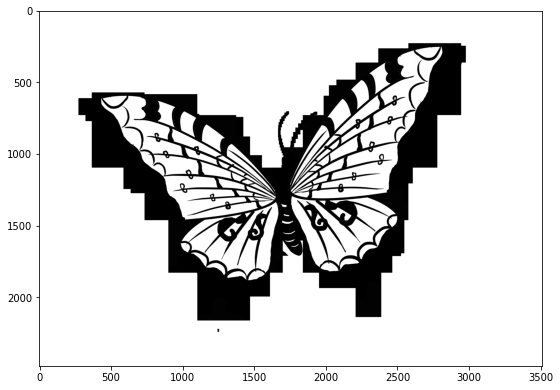

In [23]:
plt.figure(figsize=(9, 9))
plt.imshow(img_bw, cmap='gray')
plt.show();

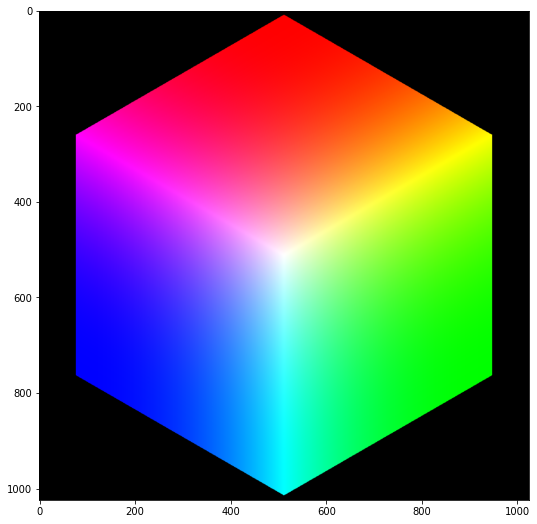

In [31]:
plt.figure(figsize=(9, 9))
plt.imshow(img_bgr)
plt.show();

3. Перетворити зображення з колірної моделі BGR в колірні моделі RGB і HSV та відобразити.

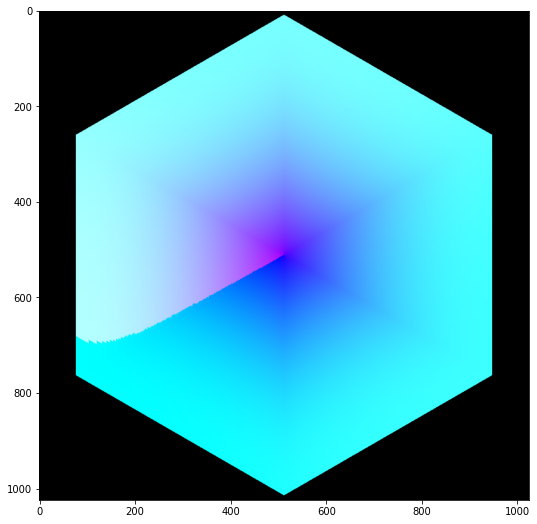

In [29]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(9, 9))
plt.imshow(img_hsv)
plt.show();

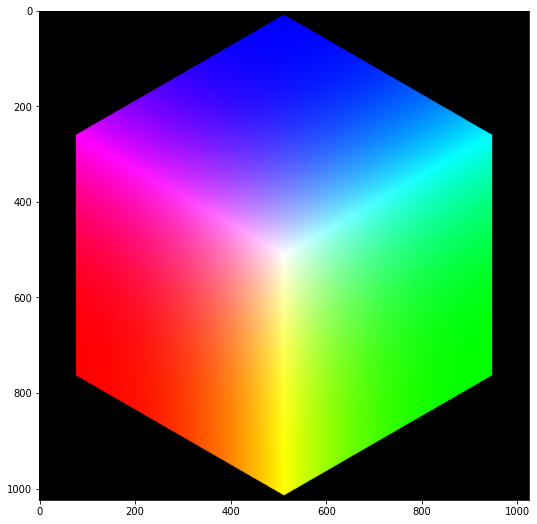

In [28]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9, 9))
plt.imshow(img_rgb)
plt.show();

4. Окремо відобразити колірні канали для зображень із колірними моделями RGB та HSV.

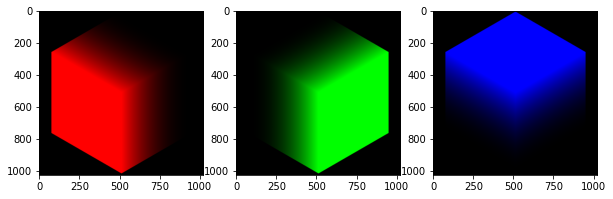

In [32]:
plt.figure(figsize=(10, 10))
plt.subplot(131);
R = np.zeros(img_rgb.shape, dtype='uint8')
R[:, :, 0] = img_rgb[:, :, 0]
plt.imshow(R)
plt.subplot(132);
G = np.zeros(img_rgb.shape, dtype='uint8')
G[:, :, 1] = img_rgb[:, :, 1]
plt.imshow(G)
plt.subplot(133);
B = np.zeros(img_rgb.shape, dtype='uint8')
B[:, :, 2] = img_rgb[:, :, 2]
plt.imshow(B)
plt.show()

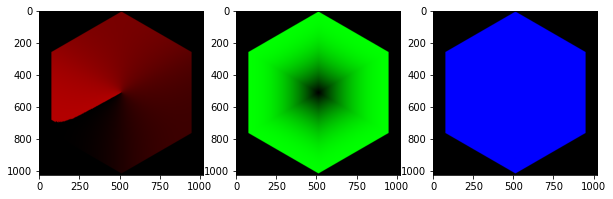

In [33]:
plt.figure(figsize=(10, 10))

plt.subplot(131);
H = np.zeros(img_hsv.shape, dtype='uint8')
H[:, :, 0] = img_hsv[:, :, 0]
plt.imshow(H)

plt.subplot(132);
S = np.zeros(img_hsv.shape, dtype='uint8')
S[:, :, 1] = img_hsv[:, :, 1]
plt.imshow(S)

plt.subplot(133);
V = np.zeros(img_hsv.shape, dtype='uint8')
V[:, :, 2] = img_hsv[:, :, 2]
plt.imshow(V)

plt.show()

5. Скопіювати область інтересу (Region of Interest) чорно-білого зображення, використовуючи наступні діапазони 0:img.shape[0]/2, 0:img.shape[1]/2.

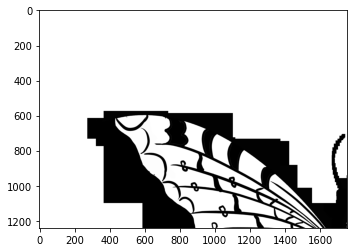

In [51]:
img_interest_bw = img_bw[0:int(img_bw.shape[0]/2), 0:int(img_bw.shape[1]/2)]
plt.imshow(img_interest_bw, cmap='gray')
plt.show()

6. Зберегти область інтересу (Region of Interest).

In [54]:
cv2.imwrite("bw_interest.png", img_interest_bw)

True